# <center>Challenge 1.2<center>

<p>Team Name: Okada Men
<p>Student Names: Olisemeka Nmarkwe, Oluwaseun Doherty
<p>Student W#s: 0762669, 0745589

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# PART I

## Prepare Data

<b>A. Create a data sets with 100 data points with the following attributes (features) for two classes as such:</b>

b1 = normal distribution N(mean=40,var=16)<br>
b2 = normal distribution N(mean=40,var=4)<br>
Pr(b1,b2,LABEL) = {(b1, b2, 1)}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,b1,10), shift in b1-dimension by 10 units towards right, data objects with class negative. Nr(LABEL) = 0<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>
Merge Pr and Nr to get PNr, and P and N to obtain PN<br>

In [ ]:
np.random.seed(0)
SIZE = 100
b1 = np.random.normal(40,16,SIZE)
b2 = np.random.normal(40,4,SIZE)

In [ ]:
Pr = np.column_stack((b1, b2))

# Create labels for class positive (1)
labels_positive = np.ones(SIZE, dtype=int)

# Add labels to the dataset Pr
Pr_with_labels = np.column_stack((Pr, labels_positive))

#Rotate Pr by 45 degrees
angle = 45

angle_rad = np.radians(angle)

rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

# Apply the rotation to your data
P = np.dot(Pr, rotation_matrix.T)
# ADD POSITIVE LABELS TO P
P = np.column_stack((P ,labels_positive))

print(P)

[[ 1.46316195e+01  8.18528710e+01  1.00000000e+00]
 [ 8.33930030e+00  5.72837662e+01  1.00000000e+00]
 [ 1.46666305e+01  6.40482245e+01  1.00000000e+00]
 [ 2.26109445e+01  8.46632229e+01  1.00000000e+00]
 [ 2.44471008e+01  7.43794551e+01  1.00000000e+00]
 [-1.65540279e+01  5.10092963e+01  1.00000000e+00]
 [ 1.19189145e+01  6.61476748e+01  1.00000000e+00]
 [ 4.01710129e-01  5.27420097e+01  1.00000000e+00]
 [-6.60668939e+00  6.08396559e+01  1.00000000e+00]
 [ 4.57863566e-01  6.54014625e+01  1.00000000e+00]
 [-3.65258745e+00  6.34804639e+01  1.00000000e+00]
 [ 1.38905452e+01  7.55844503e+01  1.00000000e+00]
 [ 1.10460731e+01  6.27427874e+01  1.00000000e+00]
 [-4.02588386e+00  6.33476177e+01  1.00000000e+00]
 [ 5.77976723e+00  6.08322537e+01  1.00000000e+00]
 [ 1.50540464e+00  6.26133260e+01  1.00000000e+00]
 [ 1.42243419e+01  7.61513508e+01  1.00000000e+00]
 [-1.88266604e+00  5.38090070e+01  1.00000000e+00]
 [ 1.80507797e+00  6.18473780e+01  1.00000000e+00]
 [-1.22713846e+01  4.95139466e+

In [ ]:
#shift in b1-dimension by 10 units towards right, data objects with class negative
Nr = Pr.copy()
Nr[:, 0] += 10
N = np.dot(Nr, rotation_matrix.T)


# Create labels for class negative (0)
labels_negative = np.zeros(SIZE, dtype=int)

# Add labels to the dataset Nr
Nr_with_labels = np.column_stack((Nr, labels_negative))

N = np.column_stack((N,labels_negative))
# ADD NEGATIVE LABELS TO N AFTER ROTATION MATRIX

print(N)

[[ 21.70268732  88.92393884   0.        ]
 [ 15.41036811  64.35483403   0.        ]
 [ 21.73769829  71.11929232   0.        ]
 [ 29.6820123   91.73429068   0.        ]
 [ 31.51816858  81.45052295   0.        ]
 [ -9.48296013  58.08036413   0.        ]
 [ 18.98998236  73.21874257   0.        ]
 [  7.47277794  59.81307751   0.        ]
 [  0.46437842  67.91072369   0.        ]
 [  7.52893138  72.47253026   0.        ]
 [  3.41848037  70.5515317    0.        ]
 [ 20.96161306  82.65551813   0.        ]
 [ 18.11714088  69.8138552    0.        ]
 [  3.04518396  70.4186855    0.        ]
 [ 12.85083504  67.90332153   0.        ]
 [  8.57647245  69.68439382   0.        ]
 [ 21.29540976  83.22241857   0.        ]
 [  5.18840177  60.88007476   0.        ]
 [  8.87614578  68.91844577   0.        ]
 [ -5.20031678  56.58501445   0.        ]
 [-22.87740695  35.82051991   0.        ]
 [ 17.57549309  67.92488555   0.        ]
 [ 16.00750204  74.26313442   0.        ]
 [ -5.07715674  58.99455746   0.  

In [ ]:
PNr = np.row_stack((Pr_with_labels,Nr_with_labels))
PN = np.row_stack((P,N))
print(PNr)

[[68.22483754 47.53260279  1.        ]
 [46.40251533 34.60896376  1.        ]
 [55.65980775 34.91806001  1.        ]
 [75.85429119 43.87758683  1.        ]
 [69.88092784 35.30750638  1.        ]
 [24.36355392 47.77448474  1.        ]
 [55.20141468 38.34552408  1.        ]
 [37.57828467 37.01018075  1.        ]
 [38.34849837 47.69176811  1.        ]
 [46.56957603 45.92205917  1.        ]
 [42.30469714 47.47023584  1.        ]
 [63.26837611 43.62417863  1.        ]
 [52.1766036  36.55509726  1.        ]
 [41.94680026 47.64025981  1.        ]
 [47.10181172 38.92798652  1.        ]
 [45.33878924 43.20982558  1.        ]
 [63.90526517 43.78900787  1.        ]
 [36.71746778 39.37995963  1.        ]
 [45.00908323 42.45631748  1.        ]
 [26.33446817 43.68882669  1.        ]
 [-0.84783705 41.50570212  1.        ]
 [50.45789753 35.60239684  1.        ]
 [53.83097918 41.1929527   1.        ]
 [28.12535967 45.30554359  1.        ]
 [76.31607398 37.22172856  1.        ]
 [16.73014921 39.40146184

<b>B. Scaling </b>

Apply scaling to PN by min-max to [0, 1], PN1:

In [ ]:
scaler = MinMaxScaler()
PN1 = scaler.fit_transform(PN)
print(PN1)

[[0.68941752 0.84311431 1.        ]
 [0.59210873 0.45303465 1.        ]
 [0.68995896 0.56043285 1.        ]
 [0.81281534 0.88773381 1.        ]
 [0.84121094 0.72446011 1.        ]
 [0.20714102 0.35341591 1.        ]
 [0.64746637 0.59376548 1.        ]
 [0.46935633 0.38092592 1.        ]
 [0.36097357 0.50949093 1.        ]
 [0.47022472 0.58191798 1.        ]
 [0.40665785 0.5514186  1.        ]
 [0.67795703 0.74359162 1.        ]
 [0.63396814 0.53970663 1.        ]
 [0.40088494 0.54930943 1.        ]
 [0.55252633 0.5093734  1.        ]
 [0.48642462 0.5376512  1.        ]
 [0.6831191  0.75259221 1.        ]
 [0.43402915 0.39786646 1.        ]
 [0.49105898 0.52549037 1.        ]
 [0.27337079 0.32967449 1.        ]
 [0.         0.         1.        ]
 [0.62559172 0.50971577 1.        ]
 [0.60134322 0.61034711 1.        ]
 [0.27527542 0.36793041 1.        ]
 [0.8906481  0.81819529 1.        ]
 [0.21522889 0.17371785 1.        ]
 [0.490184   0.43035736 1.        ]
 [0.34950554 0.49110001 1.  

Apply scaling to PN by min-max to [-1, 1], PN2:

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
PN2 = scaler.fit_transform(PN)
print(PN2)

[[ 3.78835043e-01  6.86228626e-01  1.00000000e+00]
 [ 1.84217459e-01 -9.39307059e-02  1.00000000e+00]
 [ 3.79917910e-01  1.20865694e-01  1.00000000e+00]
 [ 6.25630683e-01  7.75467621e-01  1.00000000e+00]
 [ 6.82421873e-01  4.48920218e-01  1.00000000e+00]
 [-5.85717954e-01 -2.93168174e-01  1.00000000e+00]
 [ 2.94932738e-01  1.87530952e-01  1.00000000e+00]
 [-6.12873490e-02 -2.38148160e-01  1.00000000e+00]
 [-2.78052858e-01  1.89818535e-02  1.00000000e+00]
 [-5.95505575e-02  1.63835970e-01  1.00000000e+00]
 [-1.86684293e-01  1.02837209e-01  1.00000000e+00]
 [ 3.55914069e-01  4.87183242e-01  1.00000000e+00]
 [ 2.67936285e-01  7.94132699e-02  1.00000000e+00]
 [-1.98230122e-01  9.86188538e-02  1.00000000e+00]
 [ 1.05052667e-01  1.87468077e-02  1.00000000e+00]
 [-2.71507531e-02  7.53023955e-02  1.00000000e+00]
 [ 3.66238197e-01  5.05184414e-01  1.00000000e+00]
 [-1.31941706e-01 -2.04267077e-01  1.00000000e+00]
 [-1.78820403e-02  5.09807314e-02  1.00000000e+00]
 [-4.53258416e-01 -3.40651020e-

Apply scaling to PN by std-normal, PN3:

In [ ]:
scaler = StandardScaler()
PN3 = scaler.fit_transform(PN)
print(PN3)

[[ 0.8887495   1.65509305  1.        ]
 [ 0.36372048 -0.29614545  1.        ]
 [ 0.8916708   0.24107687  1.        ]
 [ 1.55454171  1.87828665  1.        ]
 [ 1.70774998  1.06156647  1.        ]
 [-1.71337052 -0.79445368  1.        ]
 [ 0.6624023   0.40781181  1.        ]
 [-0.29858939 -0.65684439  1.        ]
 [-0.88336791 -0.01374245  1.        ]
 [-0.29390397  0.34854884  1.        ]
 [-0.63687863  0.19598624  1.        ]
 [ 0.82691451  1.15726524  1.        ]
 [ 0.5895727   0.13740117  1.        ]
 [-0.66802635  0.18543581  1.        ]
 [ 0.1501539  -0.01433032  1.        ]
 [-0.20649749  0.12711956  1.        ]
 [ 0.8547664   1.20228755  1.        ]
 [-0.48919698 -0.5721052   1.        ]
 [-0.18149285  0.0662892   1.        ]
 [-1.35602818 -0.91321193  1.        ]
 [-2.83099869 -2.56229445  1.        ]
 [ 0.54437779 -0.01261774  1.        ]
 [ 0.41354514  0.49075572  1.        ]
 [-1.34575175 -0.72184993  1.        ]
 [ 1.9744879   1.53044424  1.        ]
 [-1.66973249 -1.69333104

## Visualize Data

Plot PNr, PN, PN1, PN2, PN3 in the same figure on a separate sub-plots of 2 by 3. The axis scale should be the same. The color of P\* and N\* will be green and blue, respectively. The shape of all data points will be circle:

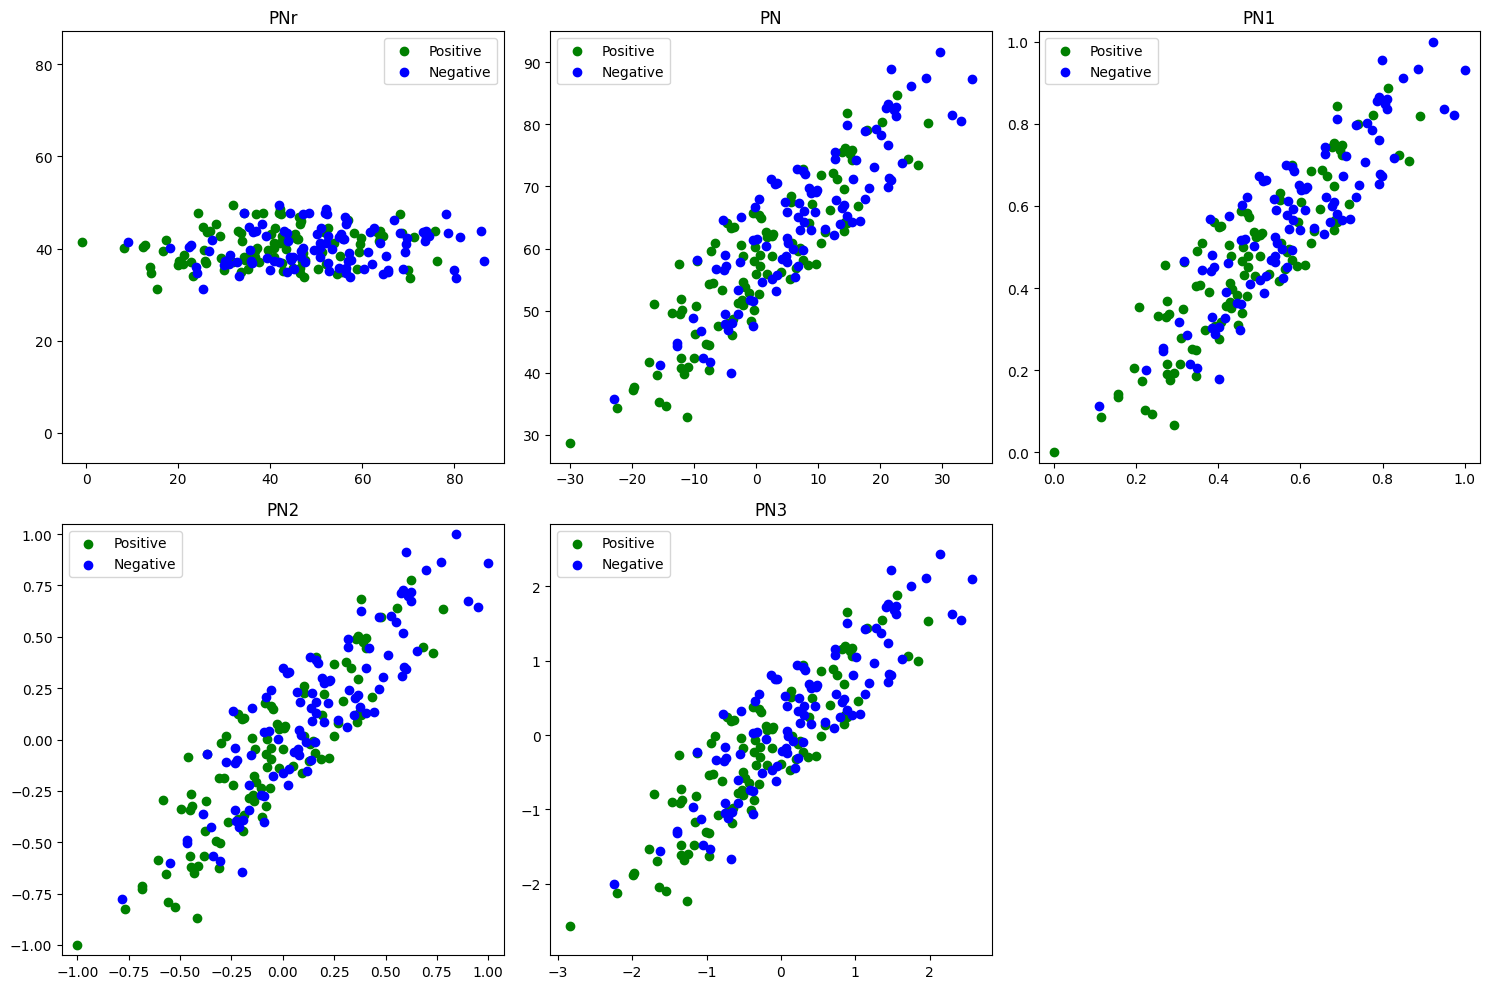

In [ ]:
fig,axs = plt.subplots(2,3, figsize = (15,10))


#Separate data based on the third column
positive_data = PNr[PNr[:, 2] == 1]
negative_data = PNr[PNr[:, 2] == 0]

#Plot PNr
axs[0,0].scatter(positive_data[:, 0], positive_data[:, 1], color='green', label='Positive')
axs[0,0].scatter(negative_data[:, 0], negative_data[:, 1], color='blue', label='Negative')
axs[0,0].set_title("PNr")
axs[0,0].axis('equal')
axs[0,0].legend()

#Plot PN
axs[0,1].scatter(PN[PN[:,2]==1][:,0], PN[PN[:,2]==1][:,1], label = 'Positive', color = 'green')
axs[0,1].scatter(PN[PN[:,2]==0][:,0], PN[PN[:,2]==0][:,1], label = 'Negative', color = 'blue')
axs[0,1].set_title('PN')
axs[0,1].axis('equal')
axs[0,1].legend()

#Plot PN1
axs[0,2].scatter(PN1[PN1[:,2]==1][:,0], PN1[PN1[:,2]==1][:,1], label = "Positive", color = 'green')
axs[0,2].scatter(PN1[PN1[:,2]==0][:,0], PN1[PN1[:,2]==0][:,1], label = "Negative", color = 'blue')
axs[0,2].set_title("PN1")
axs[0,2].axis('equal')
axs[0,2].legend()

#Plot PN2
axs[1,0].scatter(PN2[PN2[:,2]==1][:,0], PN2[PN2[:,2]==1][:,1], label = "Positive", color = 'green')
axs[1,0].scatter(PN2[PN2[:,2]==-1][:,0], PN2[PN2[:,2]==-1][:,1], label = "Negative", color = 'blue')
axs[1,0].set_title("PN2")
axs[1,0].axis('equal')
axs[1,0].legend()

#Plot PN3
axs[1,1].scatter(PN3[PN3[:,2]==1][:,0], PN3[PN3[:,2]==1][:,1], label = "Positive", color= "green")
axs[1,1].scatter(PN3[PN3[:,2]==-1][:,0], PN3[PN3[:,2]==-1][:,1], label = "Negative", color= "blue")
axs[1,1].set_title('PN3')
axs[1,1].axis('equal')
axs[1,1].legend()

fig.delaxes(axs[1,2])
plt.tight_layout()

# PART II - K-NN Classification

### A. Obtain 60% training dTrn, 20% validation dVal, 20% test dTst for each data set per class:

In [ ]:
def getData(pInput,pRatio):
    #complete as needed
    #pinput is our dataset input pratio is the train test and split
    #return dTrn, dVal, dTst
    #pRatio = (0.6, 0.2, 0.3) as an example
    np.random.shuffle(pInput)
    train_size = int(len(pInput) * pRatio[0])
    val_size = int(len(pInput) * pRatio[1])
    test_size = len(pInput) - train_size - val_size

    dTrn = pInput[:train_size]
    dVal = pInput[train_size:train_size+val_size]
    dTst = pInput[train_size+val_size:]

    return dTrn, dVal, dTst


### B. Explore K-NN Classifiers

In [ ]:
'''
Performance measures: Sensitivity, specificity, accuracy, F1

Define a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)
k = 1
Loop: Increase k by 1; k<len(pVal)
   Generate Model
   Obtain contingency table based on validation data set
   Calculate accuracy over validation data set

   k = k + 1
   #
#
Plot accuracy-K chart

Find the best k-vaue.
For the best k-value:
   Obtain contingency table for testing data set
   Calculate performance measures for testing data set
   return (performance measures, contingency table)

'''

'\nPerformance measures: Sensitivity, specificity, accuracy, F1\n\nDefine a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)\nk = 1\nLoop: Increase k by 1; k<len(pVal)\n   Generate Model\n   Obtain contingency table based on validation data set\n   Calculate accuracy over validation data set\n\n   k = k + 1\n   #\n#\nPlot accuracy-K chart\n\nFind the best k-vaue.\nFor the best k-value:\n   Obtain contingency table for testing data set\n   Calculate performance measures for testing data set\n   return (performance measures, contingency table)\n\n'

In [ ]:
def knnClassifier(pTrn, pVal, pTst, eps, *kwargs):
    accuracy_list = []
    best_k = None
    best_accuracy = 0
    best_contingency_table = None
    #complete as needed
    #return the model and performance measures
    k = 1
    while k < len(pVal):
      nbrs = KNeighborsClassifier(n_neighbors=k)
      nbrs.fit(pTrn[:,:-1], pTrn[:,-1]) #all rows all columns except the last and all rows in just the last column

      # Predict on validation dataset
      y_pred = nbrs.predict(pVal[:, :-1])

      # Obtain confusion matrix based on validation dataset
      cm = confusion_matrix(pVal[:, -1], y_pred)  # true value of pval and pred val

      # Calculate accuracy over validation dataset
      accuracy = np.sum(np.diag(cm)) / np.sum(cm)
      accuracy_list.append(accuracy)

      # Calculate sensitivity, specificity, and F1 score
      tn, fp, fn, tp = cm.ravel()
      sensitivity = tp / (tp + fn)
      specificity = tn / (tn + fp)
      F1 = 2 * tp / (2 * tp + fp + fn)

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_contingency_table = cm

      k+=1

     # Return performance measures and contingency table for the best k-value
    performance_measures = {
        'Best K': best_k,
        'Best Accuracy': best_accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': F1,
    }

    return accuracy_list, performance_measures, best_contingency_table


### C. Run experiments for each data set {PNr, PN, PN1, PN2, PN3}

In [ ]:
'''
For each data set {PNr, PN, PN1, PN2, PN3}
   Get training, validation, test data sets
   Run KNN for training and validation date sets
   Find the best model
   Obtain contingency table for the test data set
   Calculate performance measures for the test data set
'''

'\nFor each data set {PNr, PN, PN1, PN2, PN3}\n   Get training, validation, test data sets\n   Run KNN for training and validation date sets\n   Find the best model\n   Obtain contingency table for the test data set\n   Calculate performance measures for the test data set\n'

In [ ]:
PNrTrn, PNrVal, PNrTst = getData(PNr, (0.6, 0.2, 0.2))
knnClassifier(PNrTrn, PNrVal, PNrTst, 0.1)

([0.625,
  0.625,
  0.6,
  0.525,
  0.65,
  0.625,
  0.6,
  0.55,
  0.575,
  0.525,
  0.6,
  0.575,
  0.55,
  0.475,
  0.55,
  0.6,
  0.55,
  0.575,
  0.575,
  0.625,
  0.575,
  0.575,
  0.575,
  0.575,
  0.575,
  0.525,
  0.6,
  0.525,
  0.575,
  0.55,
  0.6,
  0.575,
  0.525,
  0.525,
  0.5,
  0.55,
  0.575,
  0.525,
  0.525],
 {'Best K': 5,
  'Best Accuracy': 0.65,
  'Sensitivity': 0.47368421052631576,
  'Specificity': 0.5714285714285714,
  'F1 Score': 0.4864864864864865},
 array([[12,  9],
        [ 5, 14]]))

In [ ]:
PNTrn, PNVal, PNTst = getData(PN, (0.6, 0.2, 0.2))
knnClassifier(PNTrn, PNVal, PNTst , 0.1)

([0.575,
  0.65,
  0.575,
  0.45,
  0.55,
  0.575,
  0.525,
  0.55,
  0.6,
  0.6,
  0.6,
  0.6,
  0.675,
  0.625,
  0.625,
  0.625,
  0.625,
  0.575,
  0.575,
  0.6,
  0.6,
  0.625,
  0.625,
  0.625,
  0.55,
  0.575,
  0.575,
  0.6,
  0.6,
  0.575,
  0.6,
  0.6,
  0.6,
  0.625,
  0.575,
  0.6,
  0.6,
  0.6,
  0.6],
 {'Best K': 13,
  'Best Accuracy': 0.675,
  'Sensitivity': 0.75,
  'Specificity': 0.45,
  'F1 Score': 0.6521739130434783},
 array([[11,  9],
        [ 4, 16]]))

In [ ]:
PN1Trn, PN1Val, PN1Tst = getData(PN1, (0.6, 0.2, 0.2))
knnClassifier(PN1Trn, PN1Val, PN1Tst, 0.1)

([0.55,
  0.5,
  0.675,
  0.45,
  0.55,
  0.55,
  0.575,
  0.65,
  0.6,
  0.625,
  0.65,
  0.625,
  0.65,
  0.55,
  0.625,
  0.625,
  0.625,
  0.55,
  0.625,
  0.625,
  0.65,
  0.65,
  0.575,
  0.65,
  0.6,
  0.65,
  0.625,
  0.625,
  0.6,
  0.65,
  0.65,
  0.6,
  0.625,
  0.7,
  0.725,
  0.725,
  0.725,
  0.7,
  0.675],
 {'Best K': 35,
  'Best Accuracy': 0.725,
  'Sensitivity': 0.5454545454545454,
  'Specificity': 0.8333333333333334,
  'F1 Score': 0.6486486486486487},
 array([[15,  3],
        [ 8, 14]]))

In [ ]:
PN2Trn, PN2Val, PN2Tst = getData(PN2, (0.6, 0.2, 0.2))
knnClassifier(PN2Trn, PN2Val, PN2Tst, 0.1)

([0.6,
  0.55,
  0.45,
  0.5,
  0.5,
  0.475,
  0.55,
  0.5,
  0.425,
  0.525,
  0.55,
  0.525,
  0.475,
  0.475,
  0.5,
  0.5,
  0.6,
  0.575,
  0.575,
  0.55,
  0.55,
  0.575,
  0.6,
  0.575,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6,
  0.6],
 {'Best K': 1,
  'Best Accuracy': 0.6,
  'Sensitivity': 0.7222222222222222,
  'Specificity': 0.5,
  'F1 Score': 0.6190476190476191},
 array([[13,  9],
        [ 7, 11]]))

In [ ]:
PN3Trn, PN3Val, PN3Tst = getData(PN3, (0.6, 0.2, 0.2))
knnClassifier(PN3Trn, PN3Val, PN3Tst, 0.1)

([0.45,
  0.45,
  0.45,
  0.475,
  0.55,
  0.5,
  0.5,
  0.475,
  0.475,
  0.5,
  0.5,
  0.45,
  0.5,
  0.55,
  0.6,
  0.575,
  0.55,
  0.575,
  0.575,
  0.525,
  0.6,
  0.55,
  0.525,
  0.525,
  0.525,
  0.5,
  0.575,
  0.55,
  0.6,
  0.575,
  0.6,
  0.6,
  0.6,
  0.6,
  0.625,
  0.575,
  0.6,
  0.6,
  0.625],
 {'Best K': 35,
  'Best Accuracy': 0.625,
  'Sensitivity': 0.42857142857142855,
  'Specificity': 0.8421052631578947,
  'F1 Score': 0.5454545454545454},
 array([[16,  3],
        [12,  9]]))

### D. Visualize Results

<b>Plot training (shape: Circle) and test (shape: Triangle) data sets of {PNr, PN, PN1, PN2, PN3} on a separate sub-plot in the same figure:</b>

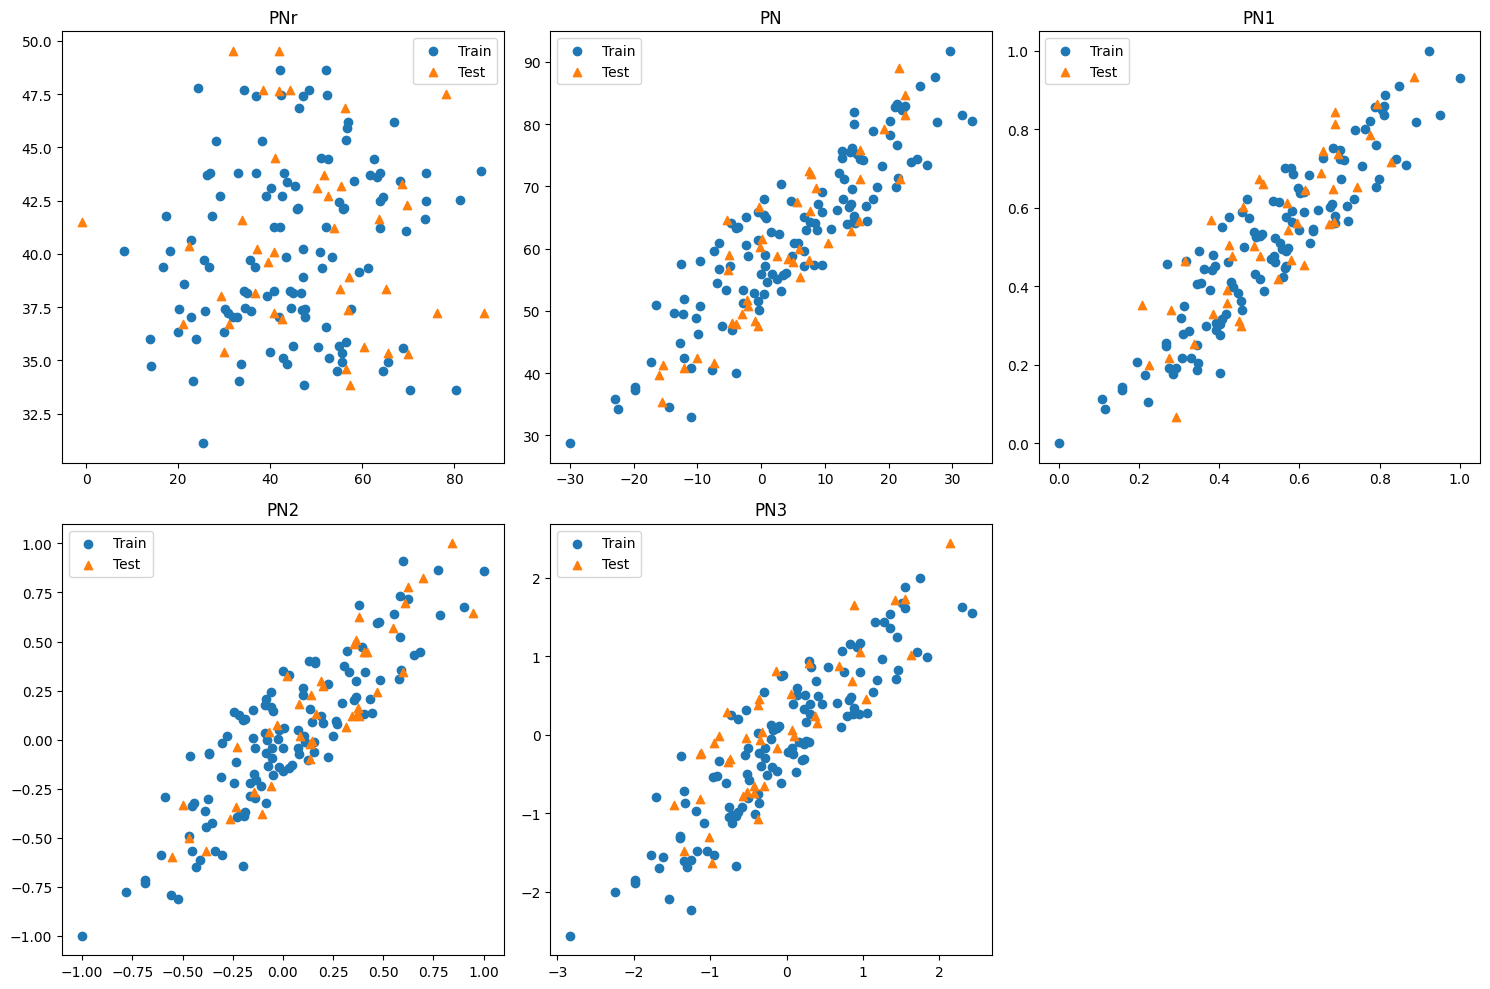

In [ ]:


def plotSets(ax, train_data, test_data, title):
    # Use the ax argument to plot on a specific subplot
    ax.scatter(train_data[:, 0], train_data[:, 1], marker='o', label='Train')
    ax.scatter(test_data[:, 0], test_data[:, 1], marker='^', label='Test')
    ax.set_title(title)
    ax.legend()

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Separate data based on the third column
positive_data = PNr[PNr[:, 2] == 1]
negative_data = PNr[PNr[:, 2] == 0]

# Plot each dataset on a different subplot
plotSets(axs[0, 0], PNrTrn, PNrTst, 'PNr')
plotSets(axs[0, 1], PNTrn, PNTst, 'PN')
plotSets(axs[0, 2], PN1Trn, PN1Tst, 'PN1')
plotSets(axs[1, 0], PN2Trn, PN2Tst, 'PN2')
plotSets(axs[1, 1], PN3Trn, PN3Tst, 'PN3')

# Remove the empty subplot
fig.delaxes(axs[1, 2])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


<b>Plot accuracy-K charts for each data set (P\*, N\*) on a separate sub-plot in the same figure:</b>

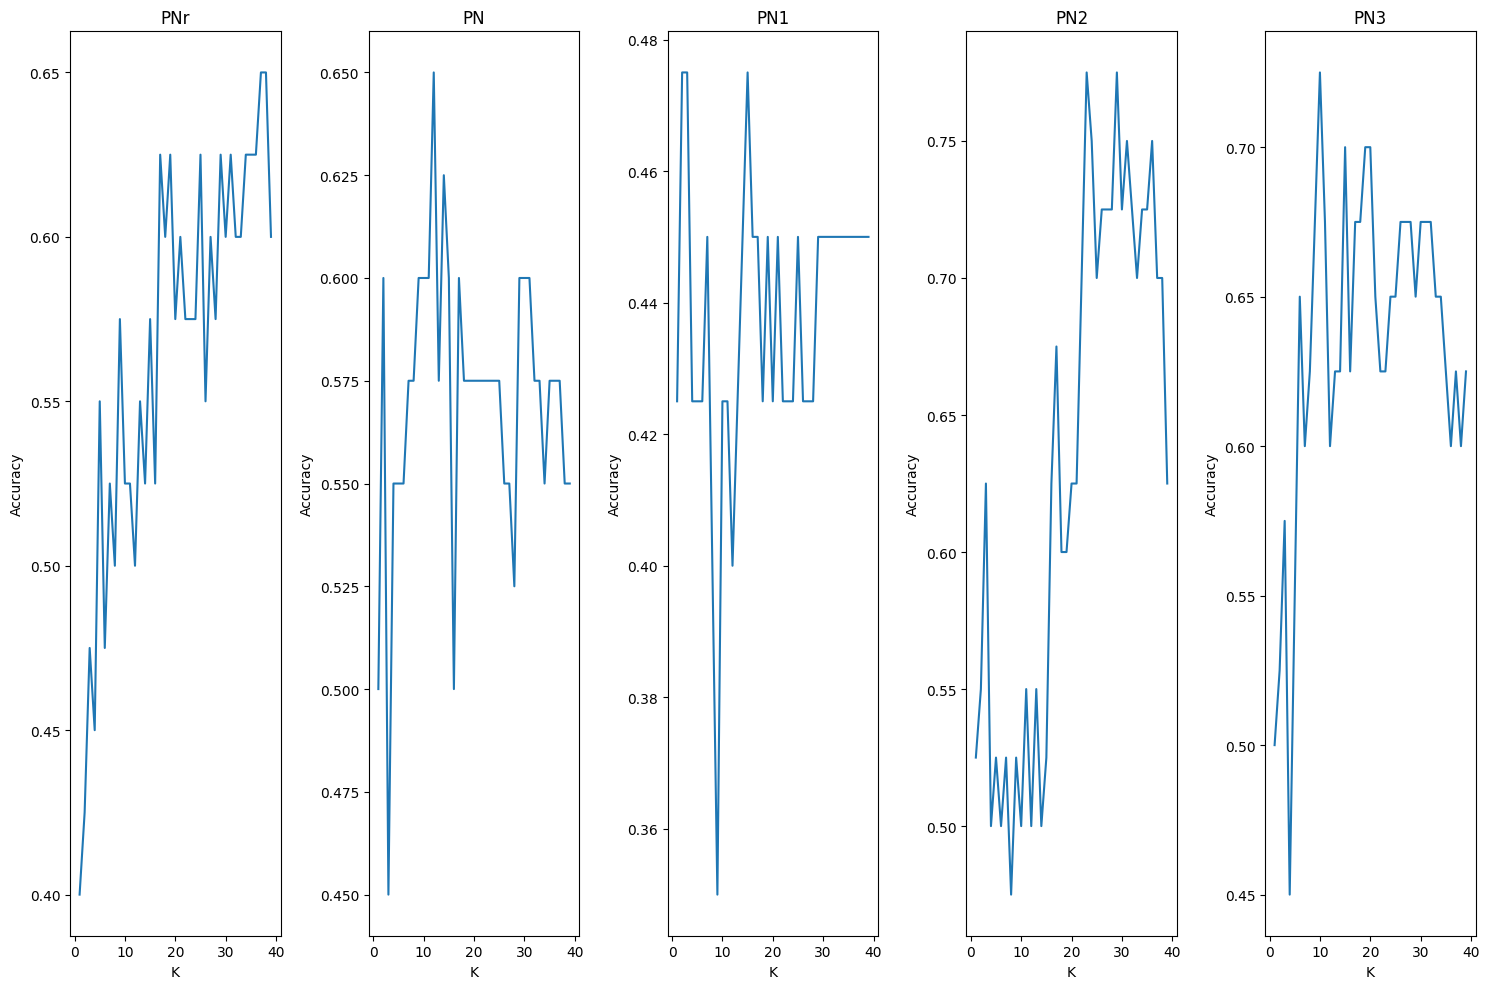

In [ ]:
def plotKChart(datasets, labels):
    fig, axs = plt.subplots(1, len(datasets), figsize=(15, 10))

    for i, data in enumerate(datasets):
        train, val, test = getData(data, (0.6, 0.2, 0.2))
        accuracy_list, _, _ = knnClassifier(train, val, test, 0.1)

        axs[i].plot(range(1, len(val)), accuracy_list)
        axs[i].set_title(labels[i])
        axs[i].set_xlabel('K')
        axs[i].set_ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

datasets = [PNr, PN, PN1, PN2, PN3]
labels = ['PNr', 'PN', 'PN1', 'PN2', 'PN3']

plotKChart(datasets, labels)


<b>Plot sensitivity, specificity, accuracy, and F1 of the best KNN-C for each data set (P\*, N\*) on a separate sub-plot in the same figure:</b> Hint: There will be 4 sup-plots with a bar-chart.

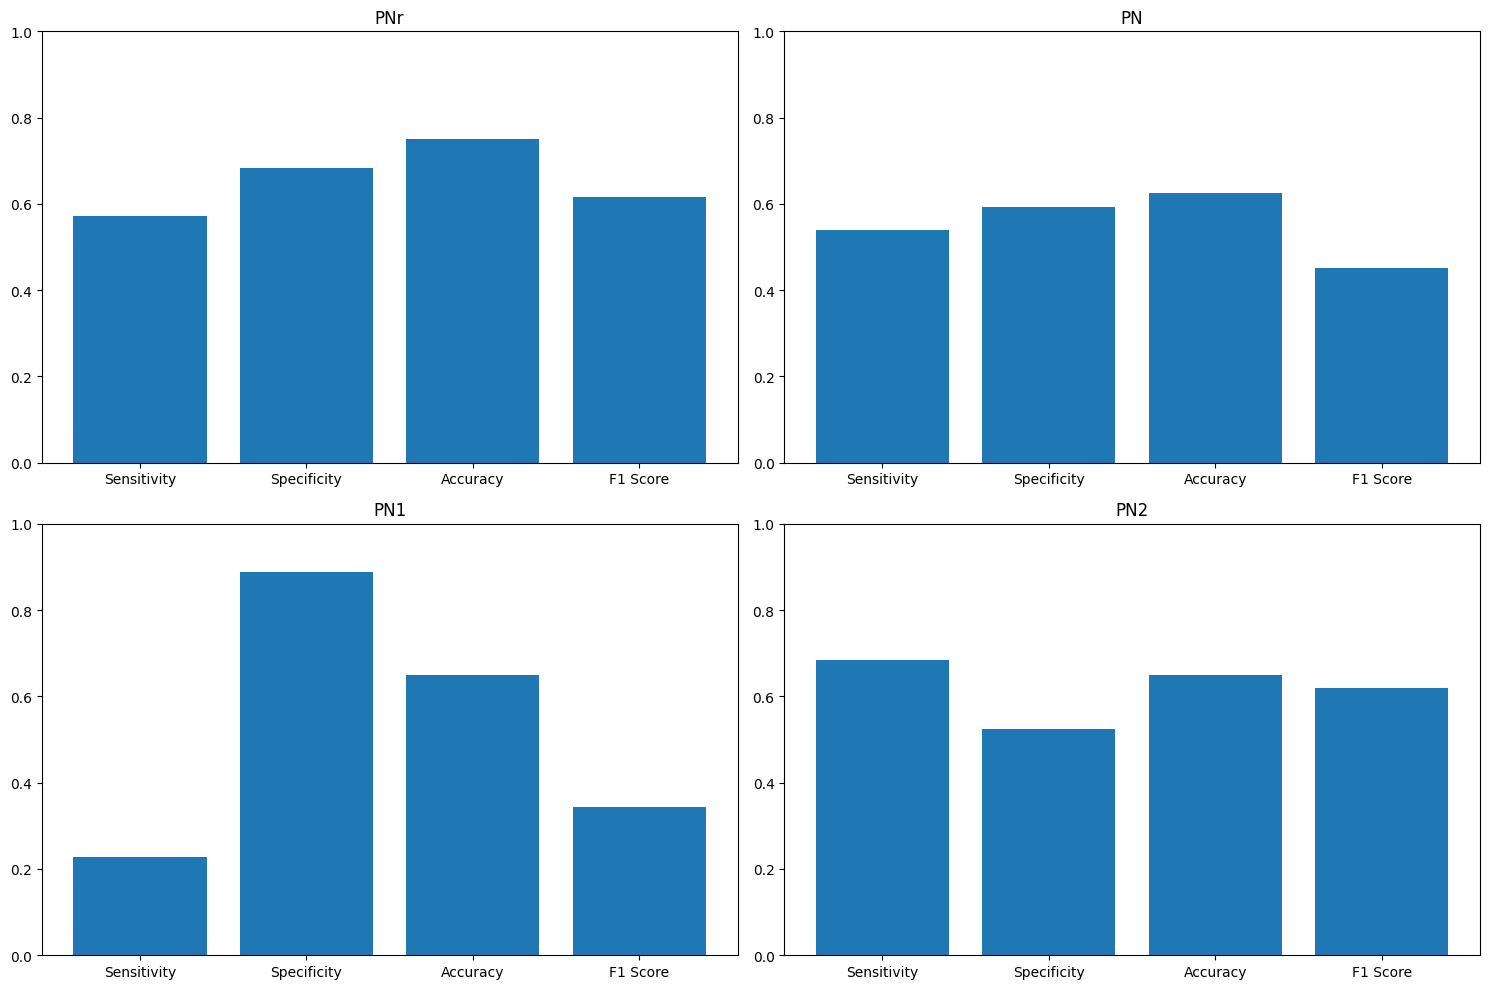

In [ ]:
def plotPerform(datasets, labels):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for i, data in enumerate(datasets):
        train, val, test = getData(data, (0.6, 0.2, 0.2))
        _, performance_measures, _ = knnClassifier(train, val, test, 0.1)

        # Extract performance measures
        sensitivity = performance_measures['Sensitivity']
        specificity = performance_measures['Specificity']
        accuracy = performance_measures['Best Accuracy']
        F1 = performance_measures['F1 Score']

        # Create a list of performance measures
        performance = [sensitivity, specificity, accuracy, F1]

        # Create a list of labels
        performance_labels = ['Sensitivity', 'Specificity', 'Accuracy', 'F1 Score']

        # Create bar chart
        axs[i//2, i%2].bar(performance_labels, performance)
        axs[i//2, i%2].set_title(labels[i])
        axs[i//2, i%2].set_ylim([0, 1])

    plt.tight_layout()
    plt.show()

datasets = [PNr, PN, PN1, PN2]
labels = ['PNr', 'PN', 'PN1', 'PN2']

plotPerform(datasets, labels)


# PART III - Discussion
Discuss how scaling affects the classification performance of K-NN classifier based on each performance measures

Scaling affects the performance. The highest accuracy is PNr, Highest specifity is PN1, Highest sensitivity is PN2 and the highest F1 score is PNr. The highest F1 score was achieved with the original dataset (PNr), suggesting that the balance between precision and recall was best in the original scale. Meaning that using the right scale is important, in this example the original scale was the best result. So a model should be tested with multiple scales to get the best result.


## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html